In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Stores UV-Vis CSV as variable, splits columns using delimiter
#Save each UV-Vis scan name as solute mass for pretty graphs
#Upload CSV file prior to running code!
df = pd.read_csv(input('Copy and paste filepath here: '), sep='\t', encoding='utf-16', encoding_errors='strict')
headers = df.columns.tolist()
data = df.values.astype(float)
wave = data[:, 0]
#Use this to verify data is working
print(headers)

Copy and paste filepath here: /content/Scan_3_7_2025_2_43_38_PM(1).csv
['wave', '1.5 ug', '3 ug', '6 ug', '15 ug', '30 ug', '45 ug', '60 ug']


Enter solution volume: 3 mL
Enter filename: UV-Vis Plot


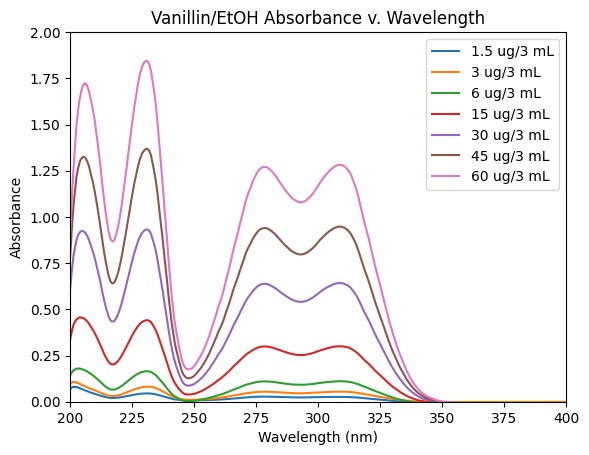

In [ ]:
#Plots absorbance v. wavelength data in matplotlib
num_cols = len(data[0])
fig, ax = plt.subplots()
solution_volume = input('Enter solution volume: ')
for col_index in range(1, num_cols):
  ax.plot(wave, data[:, col_index], label=headers[col_index] + '/' + solution_volume)
ax.legend()
ax.set_xlim(200, 400)
ax.set_ylim(0, 2)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance')
ax.set_title('Vanillin/EtOH Absorbance v. Wavelength')
fig.savefig(input('Enter filename: '), dpi = 1000)
plt.show()

Enter known concentration of sample 1 (ug/mL): 0.5
Enter known concentration of sample 2 (ug/mL): 1
Enter known concentration of sample 3 (ug/mL): 2
Enter known concentration of sample 4 (ug/mL): 5
Enter known concentration of sample 5 (ug/mL): 10
Enter known concentration of sample 6 (ug/mL): 15
Enter known concentration of sample 7 (ug/mL): 20


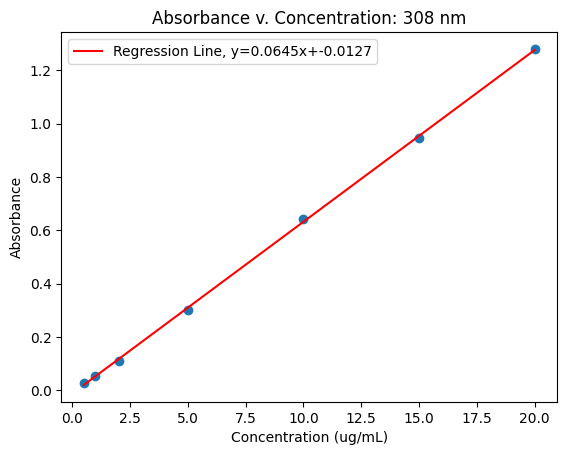

In [ ]:
#Function generates a calibration curve based on an input wavelength and filename you want the plot to be saved as
def calibration_curve(wavelength, filename):
  calibration_curve_values = []
  concentration_values = []
  wavelength_index = 0
  for value in wave:
    wavelength_index += 1
    if value == wavelength:
      for value in data[wavelength_index-1, 1:]:
        calibration_curve_values.append(value)
      i = 1
      for value in range(0, len(calibration_curve_values)):
        concentration_values.append(float(input(f'Enter known concentration of sample {i} (ug/mL): ')))
        i += 1
      fig, ax = plt.subplots()
      ax.scatter(concentration_values, calibration_curve_values)
      ax.set_xlabel('Concentration (ug/mL)')
      ax.set_ylabel('Absorbance')
      ax.set_title(f'Absorbance v. Concentration: {wavelength} nm')
      m, b = np.polyfit(concentration_values, calibration_curve_values, 1)
      ax.plot(concentration_values, m*np.array(concentration_values) + b, color='red', label=f'Regression Line, y={round(m, 4)}x+{round(b, 4)}')
      plt.legend()
      fig.savefig(filename, dpi = 1000)
      return plt.show()

calibration_curve(308, 'Calibration Curve 308 nm')